# Interactive investigation of the Temperature12k reconstruction

This notebook can be used to investigate the different latitudinal bands. Run it in your webbrowser using mybinder.org 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Chilipp/gridding-temp12k-viewer/master?urlpath=/apps/investigate_reconstruction.ipynb)

Select the band you want to investigate by selecting the corresponding band from the dropdown menu.

Don't get how to use this? Watch the little [tutorial video](#Video-Tutorial) and read the [docs](#Documentation) below for some guidance.

In [1]:
BAND = -45  # choose one of -75, -45, -15, 15, 45, 75

In [2]:
%matplotlib widget

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Javascript
import cartopy.crs as ccrs
import cartopy.feature as cf
from scatterplot_widget import ScatterplotWidget
from ipywidgets.widgets import Dropdown, VBox

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
def open_df(BAND):
    df = pd.read_csv(f'data/annual-with-single-seas-{BAND}degN.tsv', '\t')
    df = df[['clon', 'clat', 'time', 'temperature', 
             'time_needed', 'nsamples', 'lon', 'lat', 'dataSetName',
             'TSid', 'seasonality', 'datum', 'proxy', 'age_unc', 'temp_unc',
             'worldclim', 'pi', 'lipdverse']]
    df['lipdverse'] = '<a target="_blank" href="' + df.lipdverse + '">Link</a>'
    return df

In [5]:
combo_band = Dropdown(
    options = [-75, -45, -15, 15, 45, 75],
    value=BAND,
    description='Band [°N]:')

def load_data(change):
    if change['type'] == 'change' and change['name'] == 'value':
        BAND = combo_band.value
        df = open_df(BAND)
        
        map_ax.clear()
        scatter_ax.clear()
        format_fig(BAND)
        points_lasso.disconnect()
        points_lasso.init_df(df)
        fig.canvas.draw_idle()

combo_band.observe(load_data)

In [6]:
def format_fig(BAND):
    fig.suptitle(f'{BAND - 15} to {BAND + 15} °N')
    map_ax.add_feature(cf.LAND, ec='0.7')
    map_ax.set_extent([-180, 180, max(BAND - 25, -90), min(BAND + 25, 90)])

In [7]:
df = open_df(BAND)

plt.ioff()

fig = plt.figure()
fig.canvas.header_visible = False
scatter_ax = plt.subplot2grid((5, 1), (1, 0), 4, 1)
map_ax = plt.subplot2grid((5, 1), (0, 0), 1, 1, projection=ccrs.PlateCarree())
scatter_ax.set_xlabel('Time [years since 1950-01-01]')
scatter_ax.set_ylabel('Temperature anomaly to 1850-1899 CE [°C]')

format_fig(BAND)

points_lasso = ScatterplotWidget(df, scatter_ax, map_ax)


vbox = VBox(
    [combo_band, fig.canvas, points_lasso.vbox, points_lasso.table_widget])
vbox

## Documentation

### Select points on the scatter plot
Use you mouse and select points from the scatter plot (map or the age-temperature plot). You can then see the corresponding entries in the table below (if it is not refreshing, click the *refresh table* button

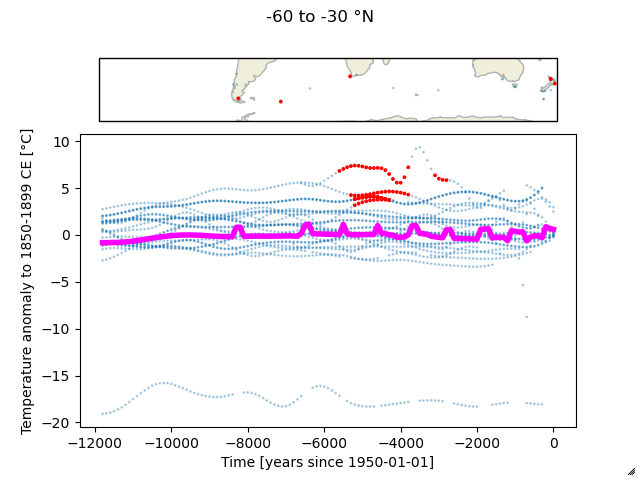

### Select the whole series
You can select the whole series to see how it behaves through time. Just click the *Whole series* button and do your selection on the map or time-series

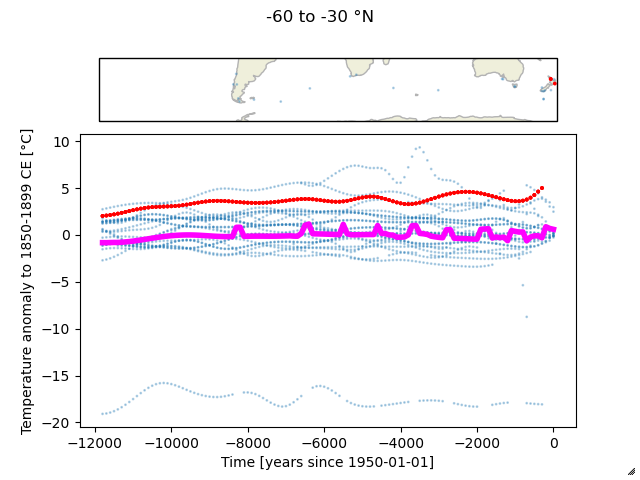

### Modify the band mean
You can exclude and include data from the band mean (thick magenta line).
1. Select some points on the scatter plot (or map)
2. Click *Exclude in mean* to not consider them when calculating the mean
3. The thick line is now updated

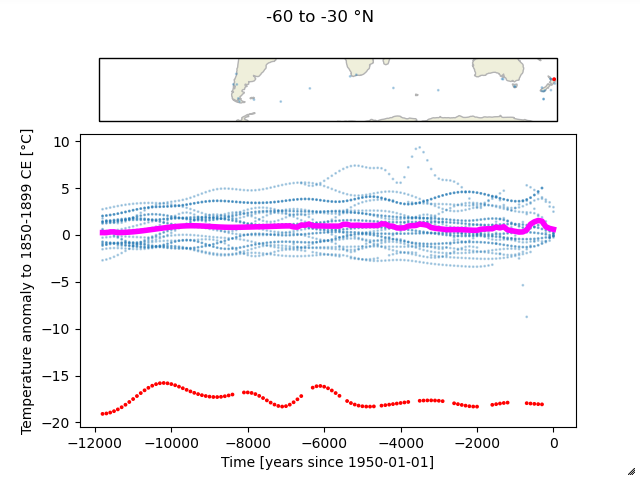

4. Choose more time-series that you want to exclude by selecting the points and clicking the *Exclude in mean* button
5. to include time-series again, 
   - either select their points and click *Include in mean*
   - or deselect everything and click *Include in mean*

### Export the selection
Enter a file name in the text-box, click the *Export to* button, and you will get a link where you can download the selected data as an Excel file

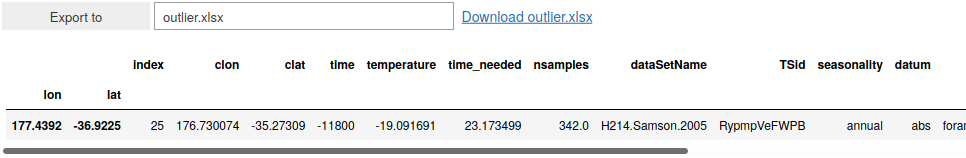

### Video Tutorial
Maybe this helps, to see what you can do here

<video src="../tree/tutorial.mp4" controls="" width="700">
    Your browser does not support the <code>video</code> element.
</video>
